# Data Preprocessing_1 outliers and transform

http://rpubs.com/Cassiebaby/427894

    In this report, the source of data sets used to analyze was from Kaggle which provides social, gender and study data from secondary school students for both math and portuguese language courses. There are two data sets were included, student-mat.csv and student-por.csv. 
    
    Basically, the report focuses on understanding, tidy, manipulate, scan and transform data.The steps of this report is organised as follow.
    The first step is to merge these two datasets to create  d3, and we selected columns we were interested to subset as d4is the data set we are going to use in further steps. 
    The second step, we summarized whole dataset and found variables were required type conversion. In this step, we mainly converted characters into factor variables including label and order. Moreover, one new variable was created in the third step. Then the whole dataset was checked to ensure it is tidy.
    Additionally, we examined there is no either missing values or special values in our data. Then we also scanned essential numeric varaibles for detecing outliers by boxplot and z.score. There were only few varaibles have outliers, then  capping was given to deal with these outliers in basic information part. 
    Eventually, after applying several methods, we found Boxcox Transformation is the best method used on selected varaible Portuguese_Final in data transformation step to decrease the skewness and to make the distribution more close to normal distribution.

In [6]:
install.packages('mlr')
library(mlr)
library(knitr)
library(dplyr)
library(lubridate)
library(readr)
library(tidyr)
library(rvest)

install.packages('deductive')
library(deductive)
library(validate)
library(Hmisc)
library(outliers)

install.packages('MVN')
library(MVN)
library(MASS)
library(caret)
library(forecast)


  There is a binary version available but the source version is later:
    binary source needs_compilation
mlr 2.14.0 2.15.0              TRUE

  Binaries will be installed


Warning message:
"package 'mlr' is in use and will not be installed"Warning message:
"package 'deductive' is in use and will not be installed"Warning message:
"package 'MVN' is in use and will not be installed"

In [12]:
d1<-read.csv('student-mat.csv', header=TRUE, stringsAsFactors = FALSE)

d1

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


In [11]:
d2<-read.csv('student-por.csv', header = TRUE, stringsAsFactors = FALSE)

d2

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17


In [18]:
d1_col_names<-names(d1)
d1_col_names

d2_col_names<-names(d2)
d2_col_names

d3 =merge(d1,d2, by=c("school",
                      "sex","age","address",
                      "famsize","Pstatus",
                      "Medu","Fedu","Mjob",
                      "Fjob","reason","nursery",
                      "internet"))

head(d3)
d3_col_names<-names(d3)
d3_col_names

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

[1] "school"     "sex"        "age"        "address"    "famsize"   
 [6] "Pstatus"    "Medu"       "Fedu"       "Mjob"       "Fjob"      
[11] "reason"     "guardian"   "traveltime" "studytime"  "failures"  
[16] "schoolsup"  "famsup"     "paid"       "activities" "nursery"   
[21] "higher"     "internet"   "romantic"   "famrel"     "freetime"  
[26] "goout"      "Dalc"       "Walc"       "health"     "absences"  
[31] "G1"         "G2"         "G3"

school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13
GP,F,15,R,GT3,T,1,1,other,other,...,3,3,4,2,4,5,2,13,11,11
GP,F,15,R,GT3,T,2,2,at_home,other,...,4,3,1,1,1,2,8,14,13,12
GP,F,15,R,GT3,T,2,4,services,health,...,4,3,2,1,1,5,2,10,11,10
GP,F,15,R,GT3,T,3,3,services,services,...,4,2,1,2,3,3,2,13,13,13
GP,F,15,R,GT3,T,3,4,services,health,...,4,3,2,1,1,5,2,11,12,12


[1] "school"       "sex"          "age"          "address"      "famsize"     
 [6] "Pstatus"      "Medu"         "Fedu"         "Mjob"         "Fjob"        
[11] "reason"       "nursery"      "internet"     "guardian.x"   "traveltime.x"
[16] "studytime.x"  "failures.x"   "schoolsup.x"  "famsup.x"     "paid.x"      
[21] "activities.x" "higher.x"     "romantic.x"   "famrel.x"     "freetime.x"  
[26] "goout.x"      "Dalc.x"       "Walc.x"       "health.x"     "absences.x"  
[31] "G1.x"         "G2.x"         "G3.x"         "guardian.y"   "traveltime.y"
[36] "studytime.y"  "failures.y"   "schoolsup.y"  "famsup.y"     "paid.y"      
[41] "activities.y" "higher.y"     "romantic.y"   "famrel.y"     "freetime.y"  
[46] "goout.y"      "Dalc.y"       "Walc.y"       "health.y"     "absences.y"  
[51] "G1.y"         "G2.y"         "G3.y"

R数据分析之merge函数
http://rstudio-pubs-static.s3.amazonaws.com/13602_96265a9b3bac4cb1b214340770aa18a1.html

In [20]:
id1 <- c(2, 3, 4, 5, 7)
heights <- c(62, 65, 71, 71, 67)
df1 <- data.frame(id = id1, heights)

id2 <- c(1, 2, 6:10)
weights <- c(147, 113, 168, 135, 142, 159, 160)
df2 <- data.frame(id = id2, weights)

In [21]:
df1

id,heights
<dbl>,<dbl>
2,62
3,65
4,71
5,71
7,67


In [22]:
df2

id,weights
<dbl>,<dbl>
1,147
2,113
6,168
7,135
8,142
9,159
10,160


In [23]:
merge(df1, df2, all=FALSE)

id,heights,weights
<dbl>,<dbl>,<dbl>
2,62,113
7,67,135


In [24]:
merge(df2, df1, all=FALSE)

id,weights,heights
<dbl>,<dbl>,<dbl>
2,113,62
7,135,67


In [25]:
merge(df1, df2, by='id', all=TRUE)

id,heights,weights
<dbl>,<dbl>,<dbl>
1,NA,147
2,62,113
3,65,NA
4,71,NA
5,71,NA
6,NA,168
7,67,135
8,NA,142
9,NA,159


In [26]:
merge(df1, df2, by = "id", all.x = TRUE)

id,heights,weights
<dbl>,<dbl>,<dbl>
2,62,113
3,65,NA
4,71,NA
5,71,NA
7,67,135


In [27]:
merge(df1, df2, by = "id", all.y = TRUE)

id,heights,weights
<dbl>,<dbl>,<dbl>
1,NA,147
2,62,113
6,NA,168
7,67,135
8,NA,142
9,NA,159
10,NA,160


In [28]:
df1$sex <- c("f", "m", "f", "f", "m")
df2$sex <- c("f", "f", "m", "m", "f", "f", "f")
merge(df1, df2)

id,sex,heights,weights
<dbl>,<chr>,<dbl>,<dbl>
2,f,62,113
7,m,67,135


In [29]:
merge(df1, df2, by = c("id", "sex"))

id,sex,heights,weights
<dbl>,<chr>,<dbl>,<dbl>
2,f,62,113
7,m,67,135


Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
G1 - first period grade (numeric: from 0 to 20)

Understand

Firstly, we subset the merged dataset by selecting columns that we were interested to explore. Types of variables and data structures were summmarised and attributes were checked below. We can see this datsset includes multiple data types, it has both characters such as school,  sex, famsize, Mjob, and numerics such as age, absences,G1.x.

In [31]:
d3_col_names

length(d3_col_names)

[1] "school"       "sex"          "age"          "address"      "famsize"     
 [6] "Pstatus"      "Medu"         "Fedu"         "Mjob"         "Fjob"        
[11] "reason"       "nursery"      "internet"     "guardian.x"   "traveltime.x"
[16] "studytime.x"  "failures.x"   "schoolsup.x"  "famsup.x"     "paid.x"      
[21] "activities.x" "higher.x"     "romantic.x"   "famrel.x"     "freetime.x"  
[26] "goout.x"      "Dalc.x"       "Walc.x"       "health.x"     "absences.x"  
[31] "G1.x"         "G2.x"         "G3.x"         "guardian.y"   "traveltime.y"
[36] "studytime.y"  "failures.y"   "schoolsup.y"  "famsup.y"     "paid.y"      
[41] "activities.y" "higher.y"     "romantic.y"   "famrel.y"     "freetime.y"  
[46] "goout.y"      "Dalc.y"       "Walc.y"       "health.y"     "absences.y"  
[51] "G1.y"         "G2.y"         "G3.y"

[1] 53

In [37]:
d4<-subset(d3, select = c(-11, -12, -13, -14, -15, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49))
str(d4)
head(d4)

'data.frame':	382 obs. of  18 variables:
 $ school     : chr  "GP" "GP" "GP" "GP" ...
 $ sex        : chr  "F" "F" "F" "F" ...
 $ age        : int  15 15 15 15 15 15 15 15 15 15 ...
 $ address    : chr  "R" "R" "R" "R" ...
 $ famsize    : chr  "GT3" "GT3" "GT3" "GT3" ...
 $ Pstatus    : chr  "T" "T" "T" "T" ...
 $ Medu       : int  1 1 2 2 3 3 3 2 3 3 ...
 $ Fedu       : int  1 1 2 4 3 4 4 2 1 3 ...
 $ Mjob       : chr  "at_home" "other" "at_home" "services" ...
 $ Fjob       : chr  "other" "other" "other" "health" ...
 $ studytime.x: int  4 2 1 3 3 3 3 2 4 4 ...
 $ G1.x       : int  7 8 14 10 10 12 12 8 16 10 ...
 $ G2.x       : int  10 6 13 9 10 12 0 9 16 11 ...
 $ G3.x       : int  10 5 13 8 10 11 0 8 16 11 ...
 $ absences.y : int  4 2 8 2 2 2 0 0 6 10 ...
 $ G1.y       : int  13 13 14 10 13 11 10 11 15 10 ...
 $ G2.y       : int  13 11 13 11 13 12 11 10 15 10 ...
 $ G3.y       : int  13 11 12 10 13 12 12 11 15 10 ...


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,studytime.x,G1.x,G2.x,G3.x,absences.y,G1.y,G2.y,G3.y
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
GP,F,15,R,GT3,T,1,1,at_home,other,4,7,10,10,4,13,13,13
GP,F,15,R,GT3,T,1,1,other,other,2,8,6,5,2,13,11,11
GP,F,15,R,GT3,T,2,2,at_home,other,1,14,13,13,8,14,13,12
GP,F,15,R,GT3,T,2,4,services,health,3,10,9,8,2,10,11,10
GP,F,15,R,GT3,T,3,3,services,services,3,10,10,10,2,13,13,13
GP,F,15,R,GT3,T,3,4,services,health,3,12,12,11,2,11,12,12


data type conversions werer applied on to convert Mjob, Fjob, Medu,Fedu and  studytime.x from character to factor variables. Furthermore, factor variables school, sex,  address, famsize, and Pstatuswere labelled, Medu,Fedu and studytime.x were ordered.

In [73]:
d4$Mjob <- as.factor(d4$Mjob)
d4$Fjob <- as.factor(d4$Fjob)
d4$Medu <- factor(d4$Medu, level = c("0", "1", "2", "3", "4"), labels = c("None", "Primary", "5th-9th Grade", "Secondary", "Higher"), ordered = TRUE)
d4$Fedu <- factor(d4$Fedu, level = c("0", "1", "2", "3", "4"), labels = c("None", "Primary", "5th-9th Grade", "Secondary", "Higher"), ordered = TRUE)
d4$studytime.x <- factor(d4$studytime.x, level = c("1", "2", "3", "4"), labels = c("<2h", "2-5h", "5-10h", ">10h"), ordered = TRUE)
d4$school <- factor(d4$school, level = c("GP", "MS"), labels = c("Gabriel Pereira", "Mousinho da Silveira"))
d4$sex <- factor(d4$sex, level = c("F", "M"), labels = c("Female", "Male"))
d4$address <- factor(d4$address, level = c("R", "U"), labels = c("Rural", "Urban"))
d4$famsize <- factor(d4$famsize, level = c("GT3", "LE3"), labels = c("Greater than 3", "Less than 3"))
d4$Pstatus <- factor(d4$Pstatus, level = c("A", "T"), labels = c("Apart", "Living Together"))

ERROR: Error in `$<-.data.frame`(`*tmp*`, Mjob, value = structure(integer(0), .Label = character(0), class = "factor")): replacement has 0 rows, data has 382


## Tidy & Manipulate Data I

Columns were renamed in order to be more distinct. After checking the data, it seems the data set is in a tidy format, because each vairable has its own column, each observation has its own row and each value has its own cell.

In [43]:
colnames(d4)
length(colnames(d4))

[1] "School"                "Sex"                   "Age"                  
 [4] "Address"               "Family_size"           "P_Cohabitation_status"
 [7] "Mother_Eduction"       "Father_Education"      "Mother_Job"           
[10] "Father_Job"            "Study_Time"            "Math_Grade1"          
[13] "Math_Grade2"           "Math_Final"            "Absence"              
[16] "Portuguese_Grade1"     "Portuguese_Grade2"     "Portuguese_Final"

[1] 18

In [42]:
colnames(d4) <- c("School", "Sex", "Age", "Address", "Family_size", "P_Cohabitation_status", "Mother_Eduction", "Father_Education", "Mother_Job", "Father_Job", "Study_Time", "Math_Grade1", "Math_Grade2", "Math_Final", "Absence", "Portuguese_Grade1", "Portuguese_Grade2", "Portuguese_Final")

colnames(d4)
length(colnames(d4))

[1] "School"                "Sex"                   "Age"                  
 [4] "Address"               "Family_size"           "P_Cohabitation_status"
 [7] "Mother_Eduction"       "Father_Education"      "Mother_Job"           
[10] "Father_Job"            "Study_Time"            "Math_Grade1"          
[13] "Math_Grade2"           "Math_Final"            "Absence"              
[16] "Portuguese_Grade1"     "Portuguese_Grade2"     "Portuguese_Final"

[1] 18

In [44]:
summarizeColumns(d4) %>% knitr::kable( caption =  'Feature Summary')

<table>
<caption>Feature Summary</caption>
 <thead>
  <tr>
   <th style="text-align:left;"> name </th>
   <th style="text-align:left;"> type </th>
   <th style="text-align:right;"> na </th>
   <th style="text-align:right;"> mean </th>
   <th style="text-align:right;"> disp </th>
   <th style="text-align:right;"> median </th>
   <th style="text-align:right;"> mad </th>
   <th style="text-align:right;"> min </th>
   <th style="text-align:right;"> max </th>
   <th style="text-align:right;"> nlevs </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> School </td>
   <td style="text-align:left;"> factor </td>
   <td style="text-align:right;"> 0 </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> 0.1047120 </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> NA </td>
   <td style="text-align:right;"> 40 </td>
   <td style="text-align:right;"> 342 </td>
   <td style="text-align:right;"> 2 </td>
  </tr>
  <tr>
   <t

##Tidy & Manipulate Data II

Total_Grade was created by adding Math_Final and Portuguese_Final to show students academic performance as a whole.

In [45]:
d4 <- mutate(d4, Total_Grade = Math_Final + Portuguese_Final)
head(d4$Total_Grade, n=10)

[1] 23 16 25 18 23 23 12 19 31 21

## Scan I

There is no either missing values or special values in our data. Due to long output about checking special values, the results were not show here.

In [46]:
sum(is.na(d4))

# is.special <- function(x){
# if (is.numeric(x)) !is.finite(x)
# }
# sapply(d4, is.special)

[1] 0

## Scan II

The following numeric variables were scanned for outliers.

Age: the result indicates only one outlier which is 22, but it is reasonable to have a student who is 22 year old.

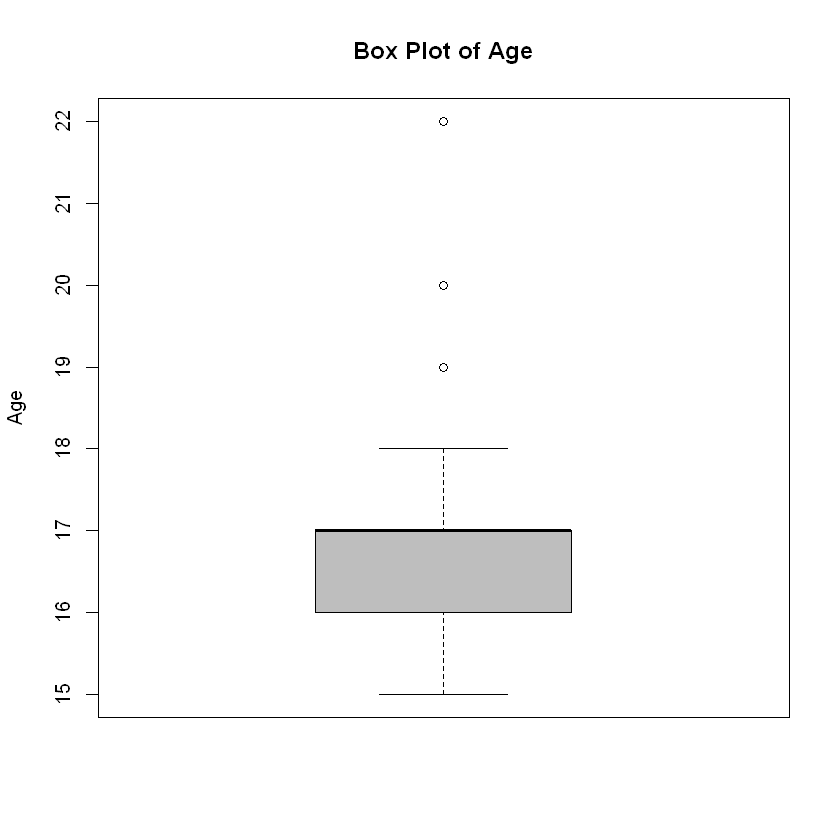

In [59]:
boxplot(d4$Age, main = "Box Plot of Age", ylab = "Age", col = "grey")

In [75]:
z.scores1 <- d4$Age %>% scores(type = "z")
#z.scores1
# z-score ：measure the variance
which( abs(z.scores1) >3 )  # 342

[1] 342

In [58]:
length (which( abs(z.scores1) >3 ))

[1] 1

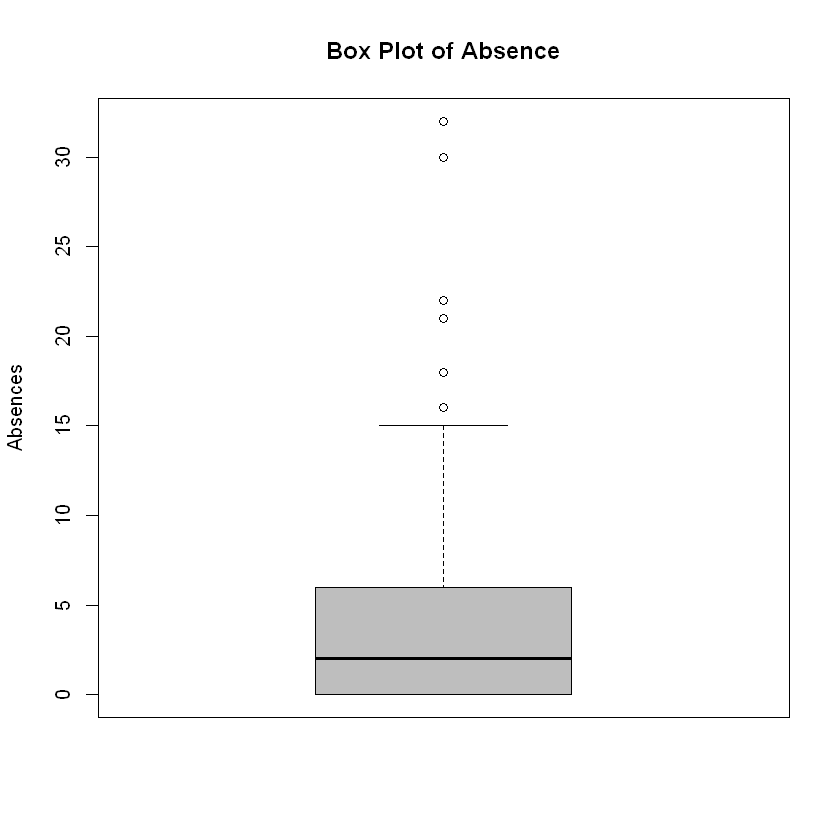

In [50]:
boxplot(d4$Absence, main = "Box Plot of Absence", ylab = "Absences", col = "grey")

In [52]:
z.scores2 <- d4$Absence %>% scores(type = "z")
length (which( abs(z.scores2) >3 )) #6

[1] 6

In [60]:
which( abs(z.scores2) >3 ) 

[1]  96 131 141 286 288 300

In [61]:
summary(d4$Absence)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   3.673   6.000  32.000 

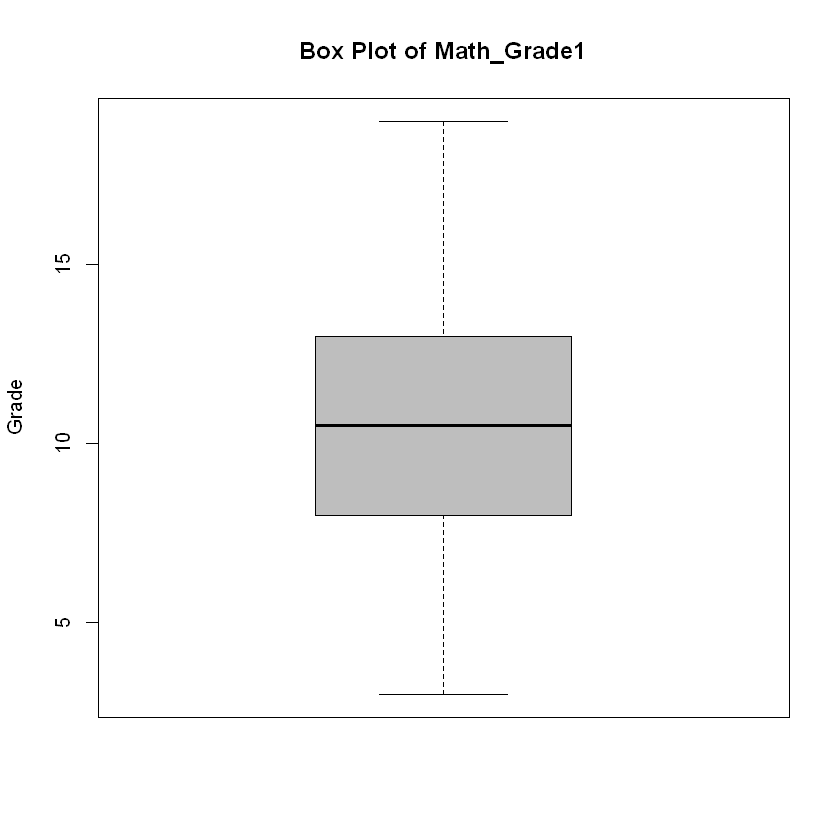

In [62]:
# Math_Grade 1 : No outlier

boxplot(d4$Math_Grade1, main = "Box Plot of Math_Grade1", ylab = "Grade", col = "grey")

In [63]:
z.scores3 <- d4$Math_Grade1 %>% scores(type = "z")
length (which( abs(z.scores3) >3 ))

[1] 0

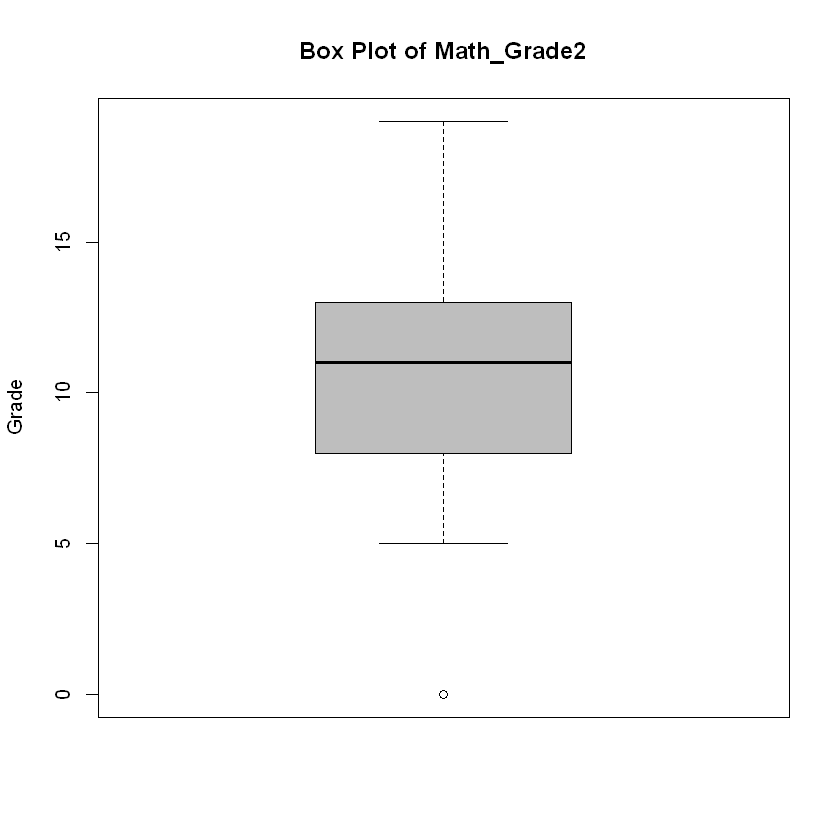

In [64]:
#Math_Grade2: one outlier which Math_Grade2 is 0.

boxplot(d4$Math_Grade2, main = "Box Plot of Math_Grade2", ylab = "Grade", col = "grey")

In [65]:
z.scores4 <- d4$Math_Grade2 %>% scores(type = "z")
length (which( abs(z.scores4) >3 )) #0

[1] 0

In [76]:
which( abs(z.scores4) >3 ) 

integer(0)

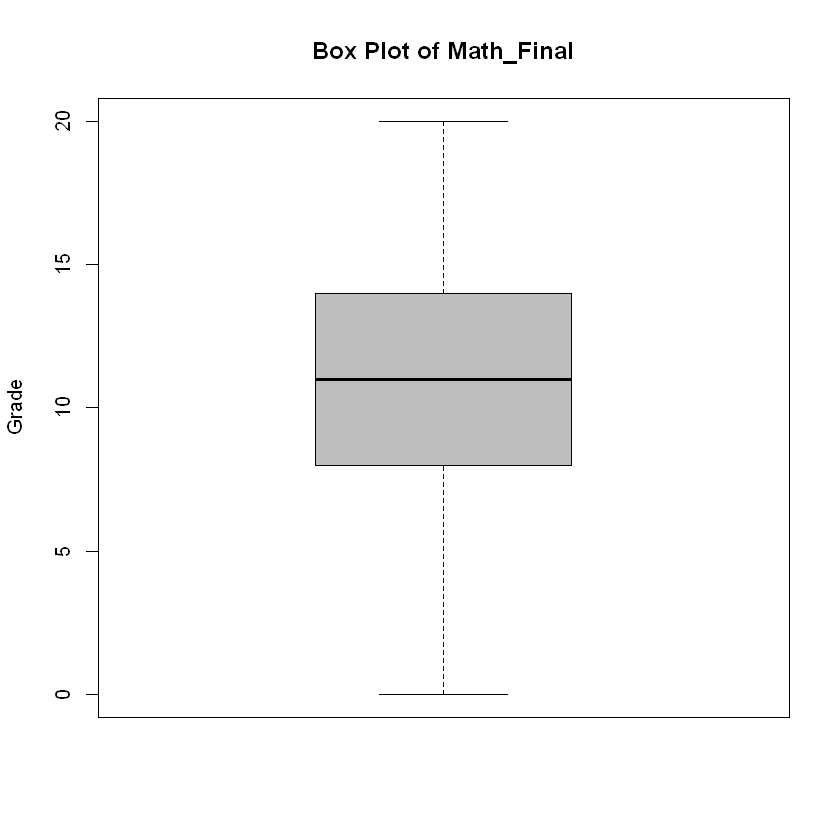

In [67]:
# Math_Final: No Outlier

boxplot(d4$Math_Final, main = "Box Plot of Math_Final", ylab = "Grade", col = "grey")

In [68]:
z.scores5 <- d4$Math_Final %>% scores(type = "z")
length (which( abs(z.scores5) >3 )) #0

[1] 0

[1] 1

[1] 151

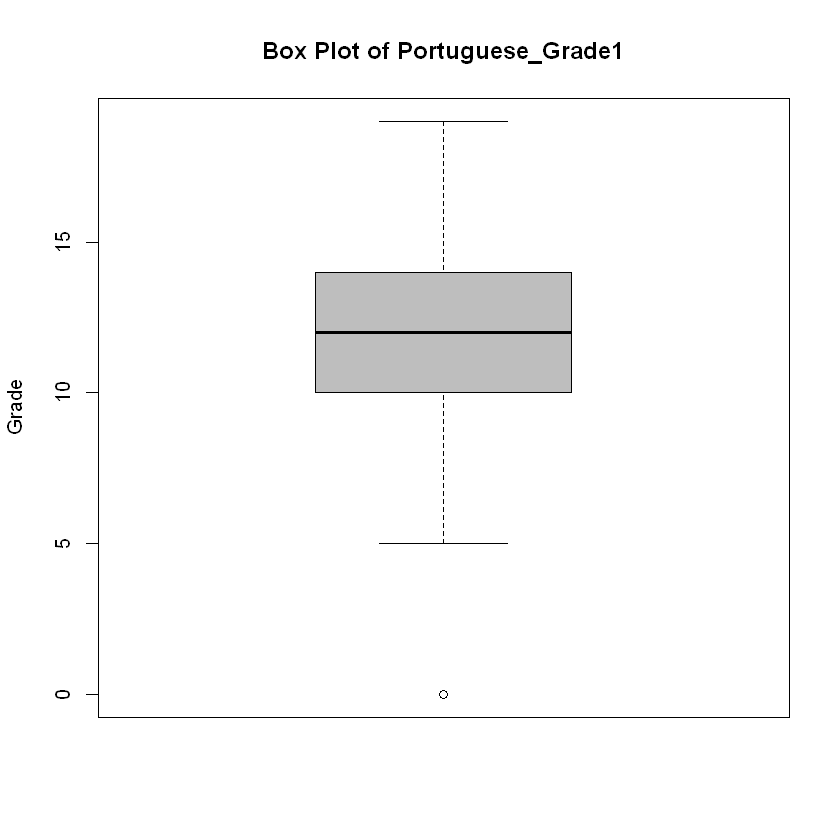

In [77]:
#Portuguese_Grade1: No outlier

boxplot(d4$Portuguese_Grade1, main = "Box Plot of Portuguese_Grade1", ylab = "Grade", col = "grey") # due to page limit, box plot is not shown here
z.scores6 <- d4$Portuguese_Grade1 %>% scores(type = "z")
length (which( abs(z.scores6) >3 )) #0

which(abs(z.scores6)>3)  # 151

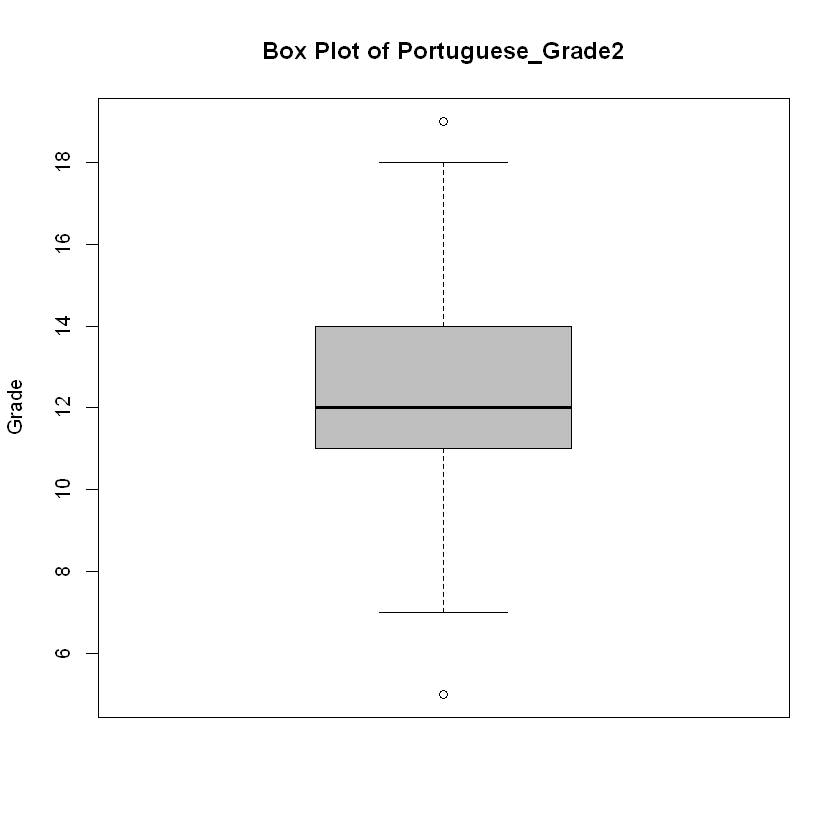

In [88]:
boxplot(d4$Portuguese_Grade2, main = "Box Plot of Portuguese_Grade2", ylab = "Grade", col = "grey")

In [83]:
z.scores7 <- d4$Portuguese_Grade2 %>% scores(type = "z")
length (which( abs(z.scores7) >3 )) #0
which( abs(z.scores7) >3 )

[1] 0

integer(0)

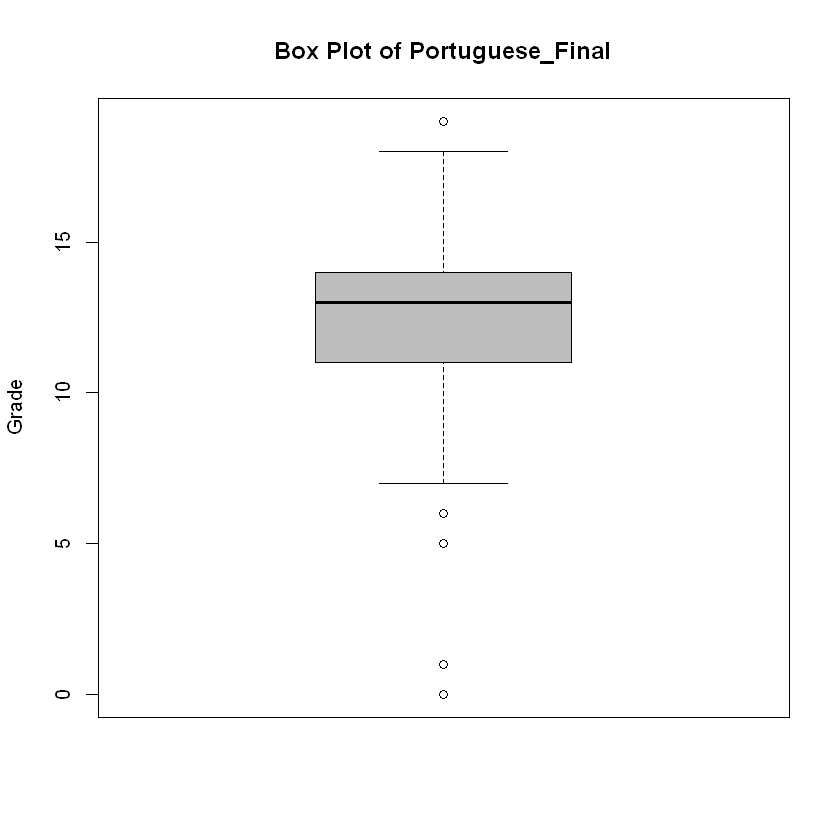

In [85]:
boxplot(d4$Portuguese_Final, main = "Box Plot of Portuguese_Final", ylab = "Grade", col = "grey")

In [86]:
z.scores8 <- d4$Portuguese_Final %>% scores(type = "z")
length (which( abs(z.scores8) >3 )) #6

[1] 6

In [87]:
which( abs(z.scores8) >3 ) 

[1] 239 331 353 371 373 382

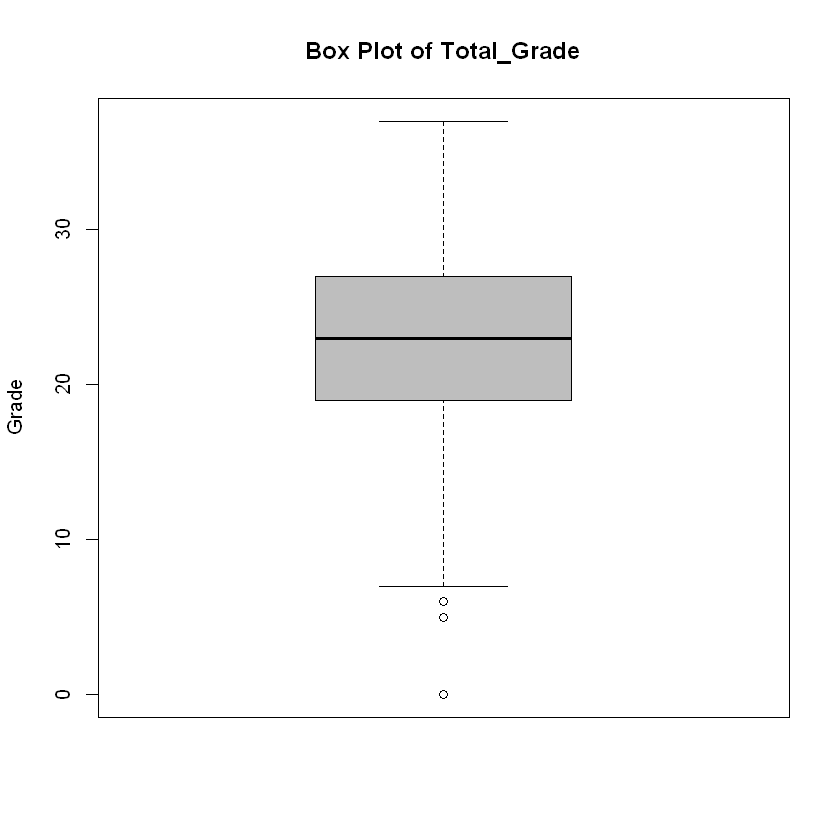

In [89]:
boxplot(d4$Total_Grade, main = "Box Plot of Total_Grade", ylab = "Grade", col = "grey")

In [90]:
z.scores9 <- d4$Total_Grade %>% scores(type = "z")
length (which( abs(z.scores9) >3 )) #6

[1] 2

In [91]:
which( abs(z.scores9) >3 ) 

[1] 331 382

##Dealing wih outliers

Capping function was used to deal with outliers that outliers were replacing with the nearest neighbours that are not outliners.

In [92]:
cap <- function(x){
    quantiles <- quantile( x, c(.05, 0.25, 0.75, .95 ) )
    x[ x < quantiles[2] - 1.5*IQR(x) ] <- quantiles[1]
    x[ x > quantiles[3] + 1.5*IQR(x) ] <- quantiles[4]
    x
}
summary(d4$Absence)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   3.673   6.000  32.000 

In [93]:
Absence_capped <- d4$Absence %>% cap()
summary(Absence_capped)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   3.435   6.000  15.000 

In [94]:
summary(d4$Math_Grade2)

Math_Grade2_capped <- d4$Math_Grade2 %>% cap()
summary(Math_Grade2_capped)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.25   11.00   10.71   13.00   19.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00    8.25   11.00   10.88   13.00   19.00 

In [95]:
summary(d4$Portuguese_Final)

PFinal_capped <- d4$Portuguese_Final %>% cap()
summary(PFinal_capped)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   11.00   13.00   12.52   14.00   19.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   11.00   13.00   12.65   14.00   18.00 

In [96]:
summary(d4$Total_Grade)

Total_Grade_capped <- d4$Total_Grade %>% cap()
summary(Total_Grade_capped)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    19.0    23.0    22.9    27.0    37.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   7.00   19.00   23.00   22.99   27.00   37.00 

## Transform

At first, we used hist function on Math_Final and Portuguese_Final to discover whether data transformation is necessary to applied on them.

Based on histograms below, Math_Final seems to be symmetric despite its left tail is not tail-off. However, distribution of Portuguese_Final was left-skewed. Therefore, we aimed to change its scale for better understanding of this variable.

log10, log, mean-centering, minmaxnormalise and Box-Cox Transforamtion were applied on Portuguese_Final. As the result, Boc-Cox transformation was found to be the best transformation technique as it gave the best result for decreasing the skewness and converting the distribution into a normal distribution.

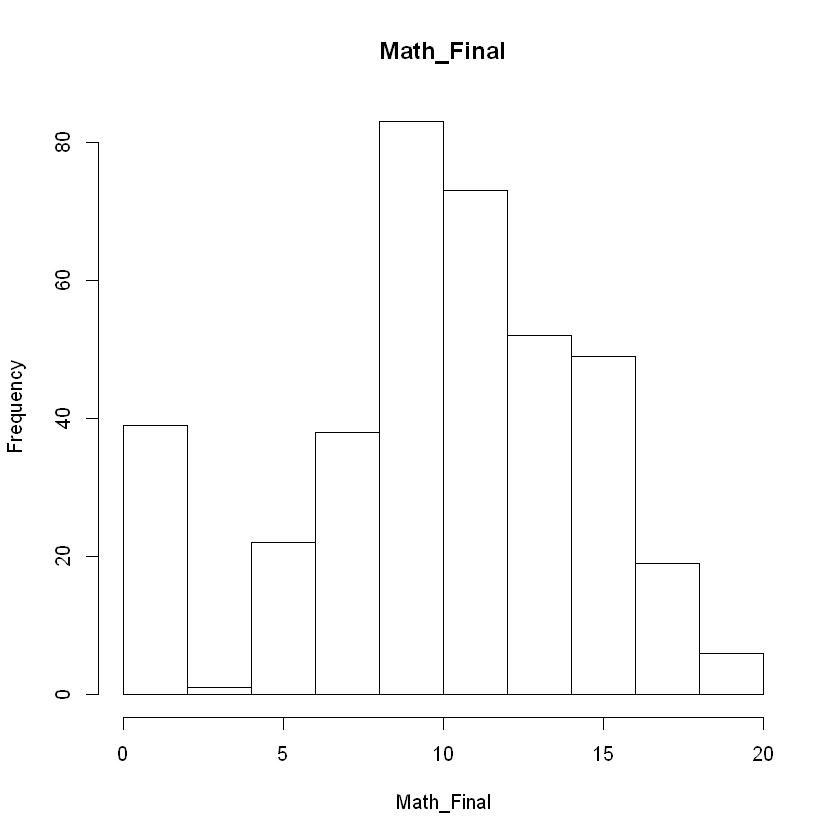

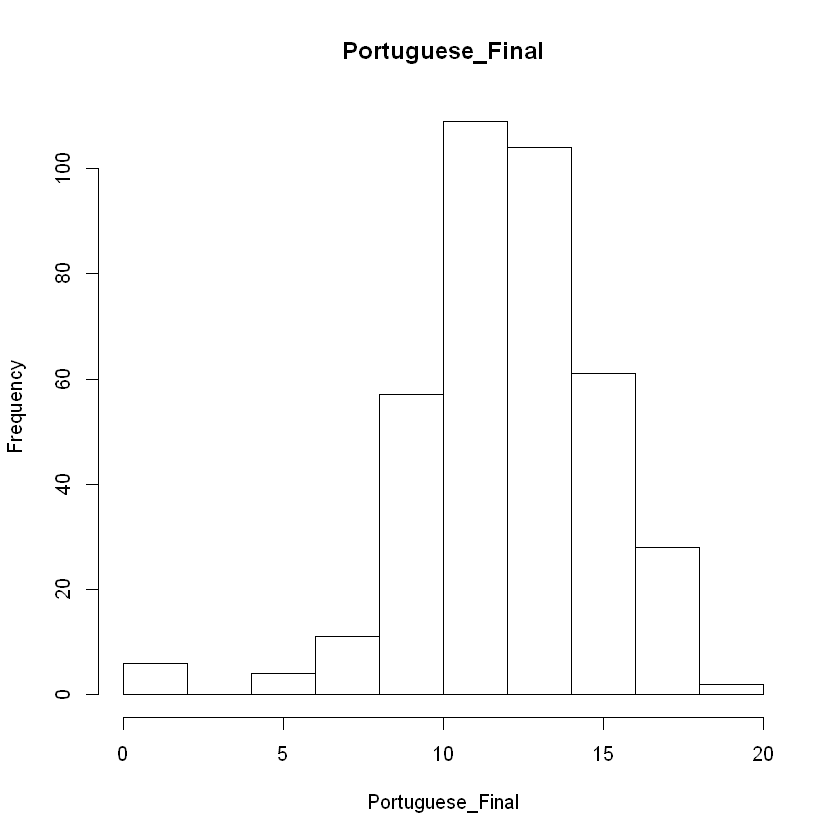

In [97]:
d4_Sub <- d4 %>%  dplyr::select(Math_Final, Portuguese_Final)
colnames <- colnames(d4_Sub)
for (i in 1:2) {
  hist(unlist(d4_Sub[ ,i]), main = colnames[i], xlab = colnames[i])
}

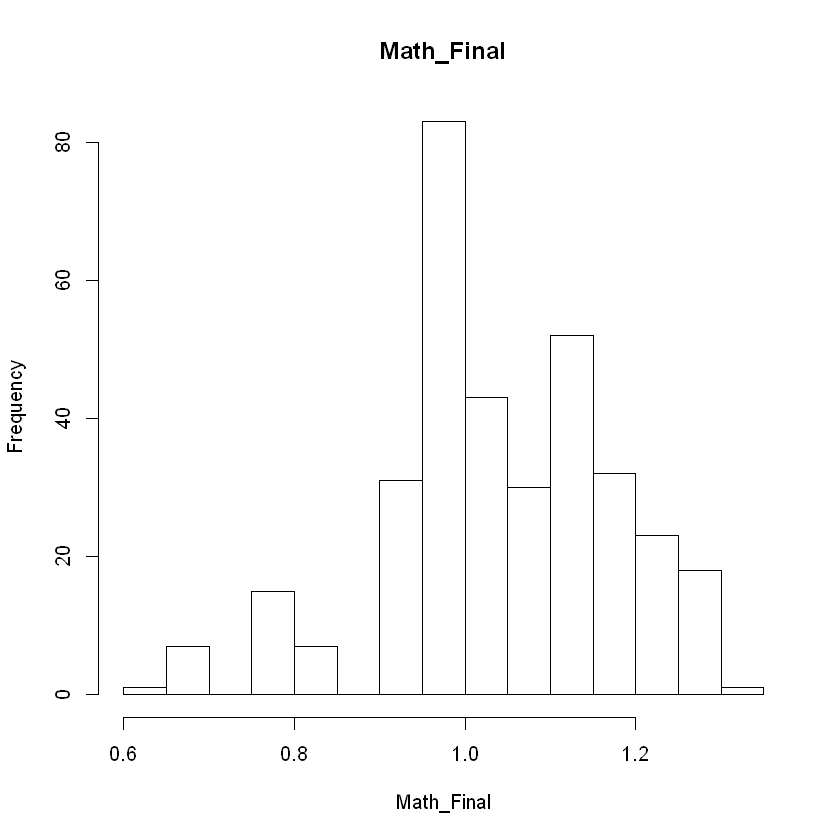

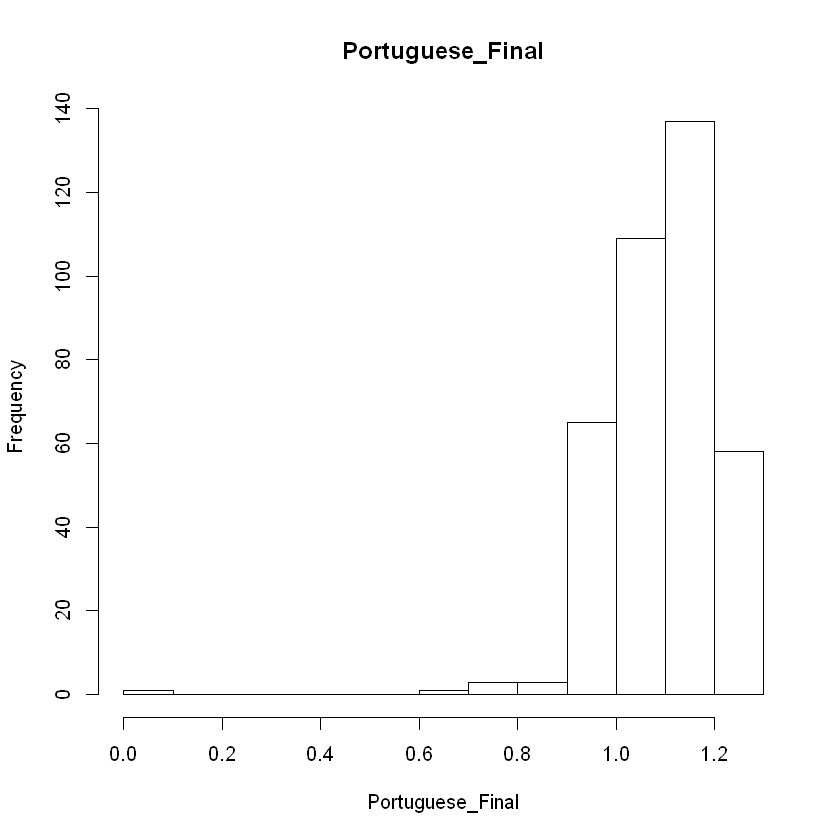

In [105]:
#d4_Sub <- d4 %>%  dplyr::select(Math_Final, Portuguese_Final)

d4_log <- sapply(d4_Sub, log10)

for (i in 1:2){
hist(unlist(d4_log[,i]), main = colnames[i], xlab = colnames[i])}

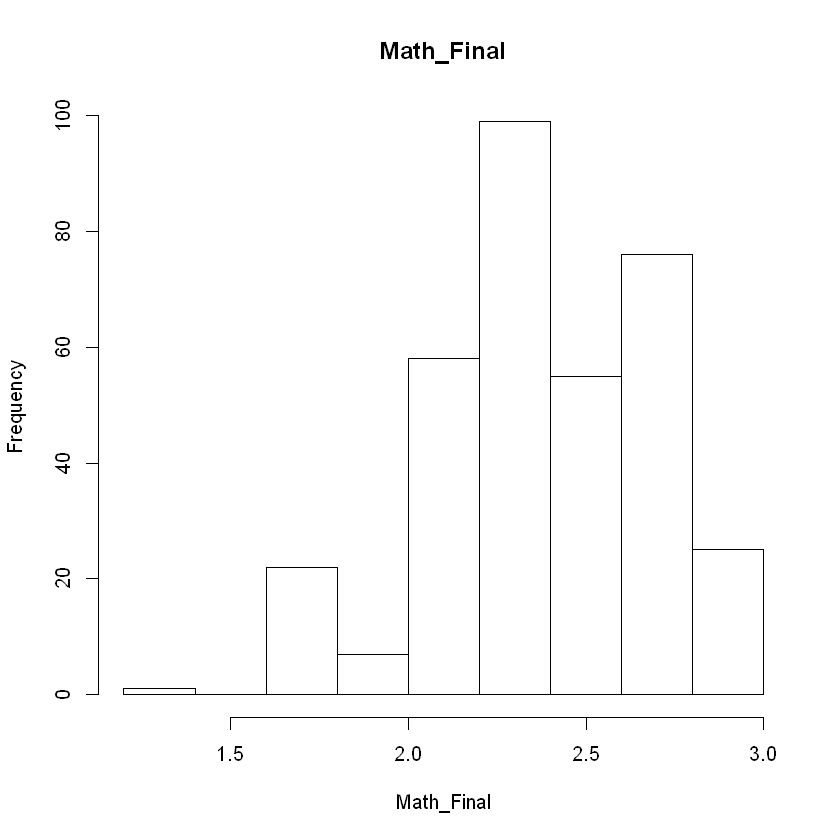

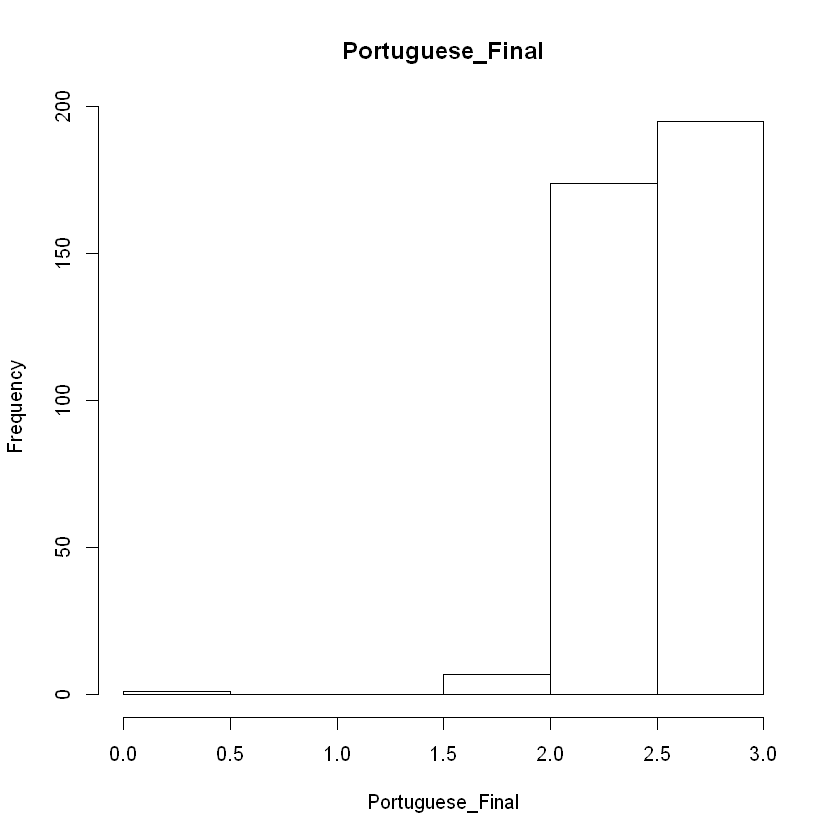

In [106]:
d4_ln <- sapply(d4_Sub, log)

for( i in 1:2){
hist(unlist(d4_ln[,i]), main = colnames[i], xlab = colnames[i])}

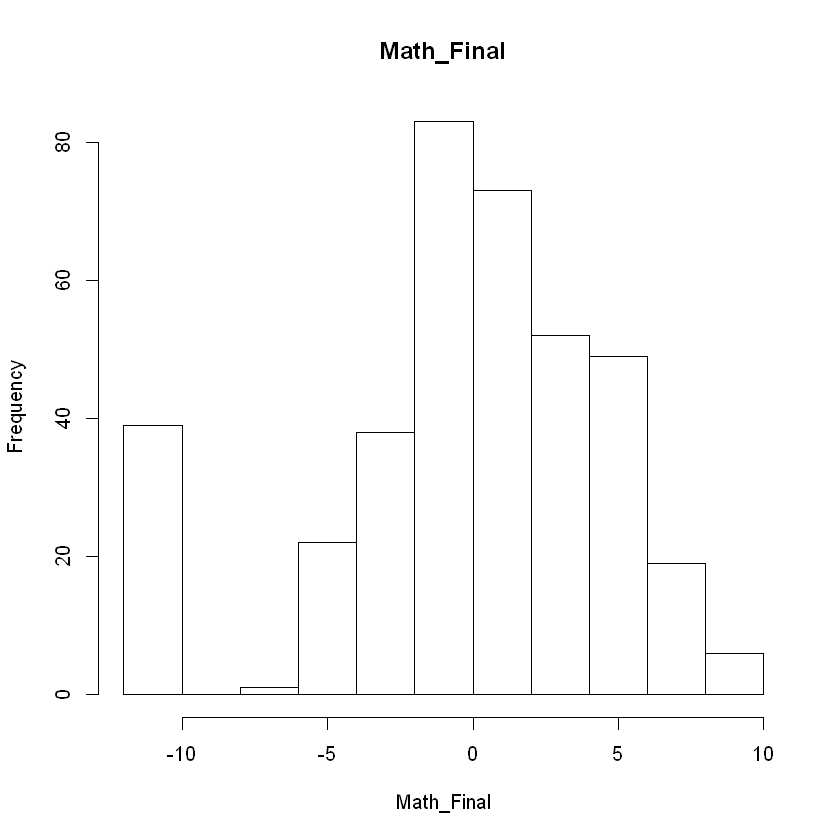

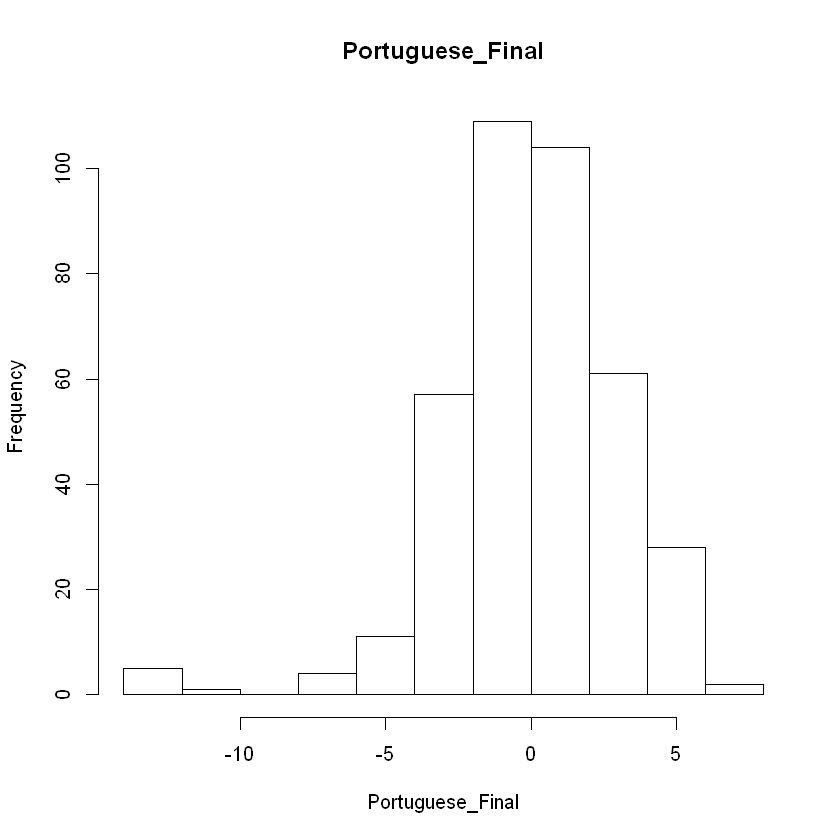

In [107]:
center_d4 <- apply(d4_Sub, 2, function(x) scale(x, center = TRUE, scale = FALSE))
    
for (i in 1:2){
hist(unlist(center_d4[,i]), main = colnames[i], xlab = colnames[i])}

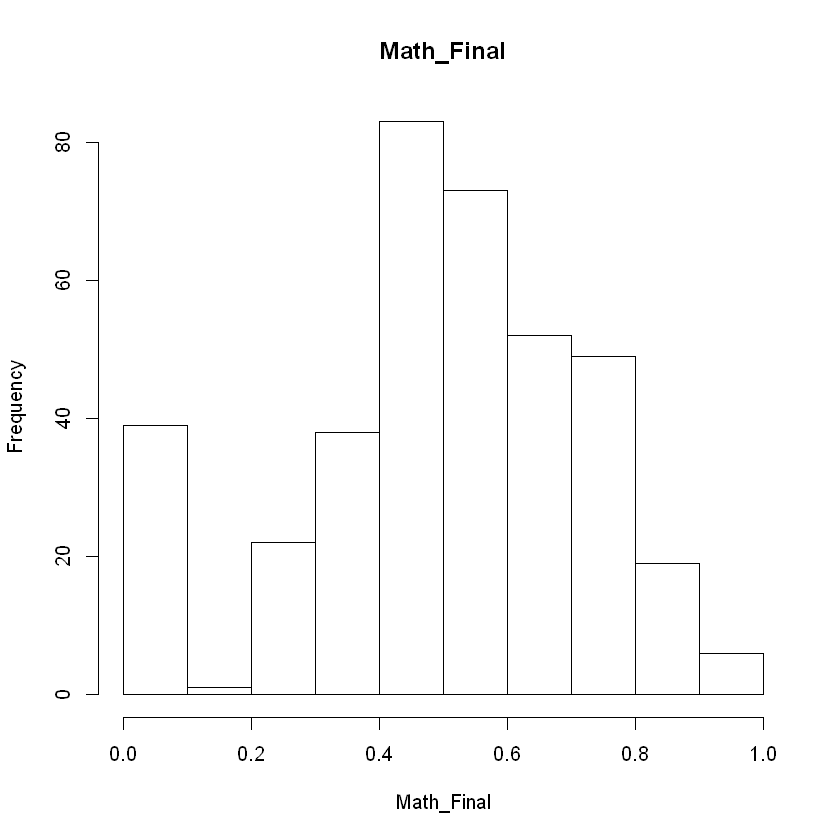

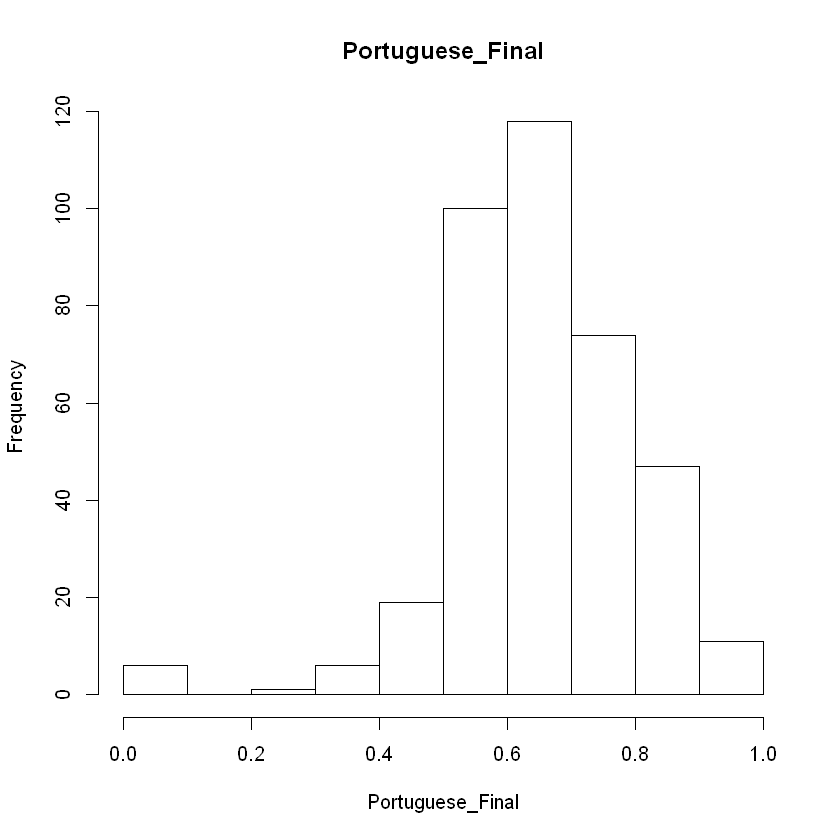

In [108]:
d4_Check2 <- d4_Sub[complete.cases(d4_Sub),]
minmaxnormalise <- function(x){(x- min(x)) /(max(x)-min(x))}
minmax_d4 <- sapply(d4_Check2, minmaxnormalise)

for( i in 1:2){
hist(unlist(minmax_d4[,i]), main = colnames[i], xlab = colnames[i])}

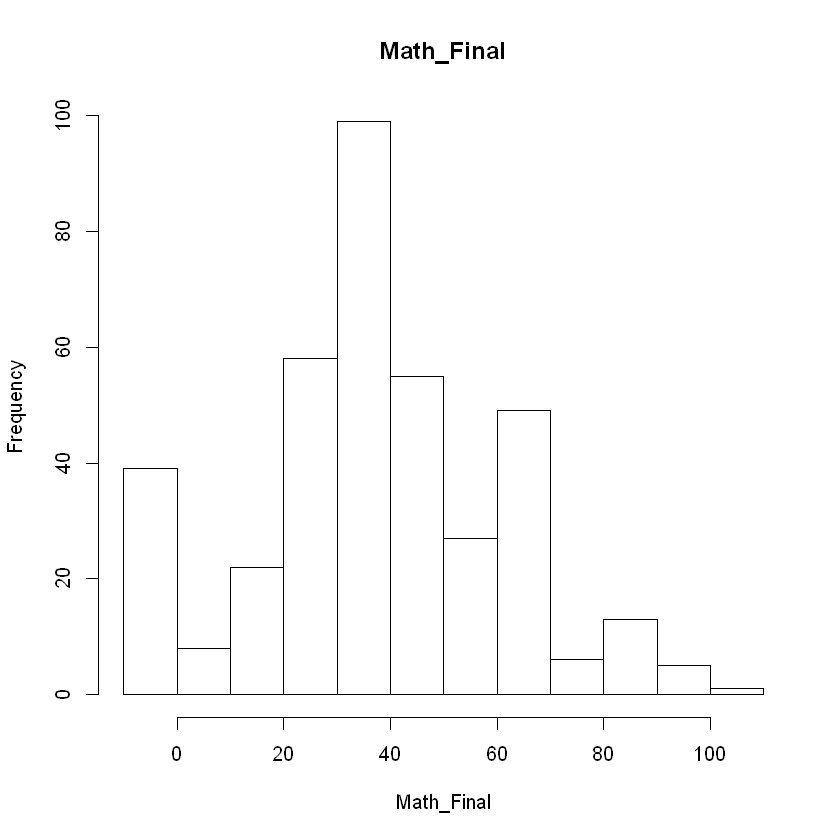

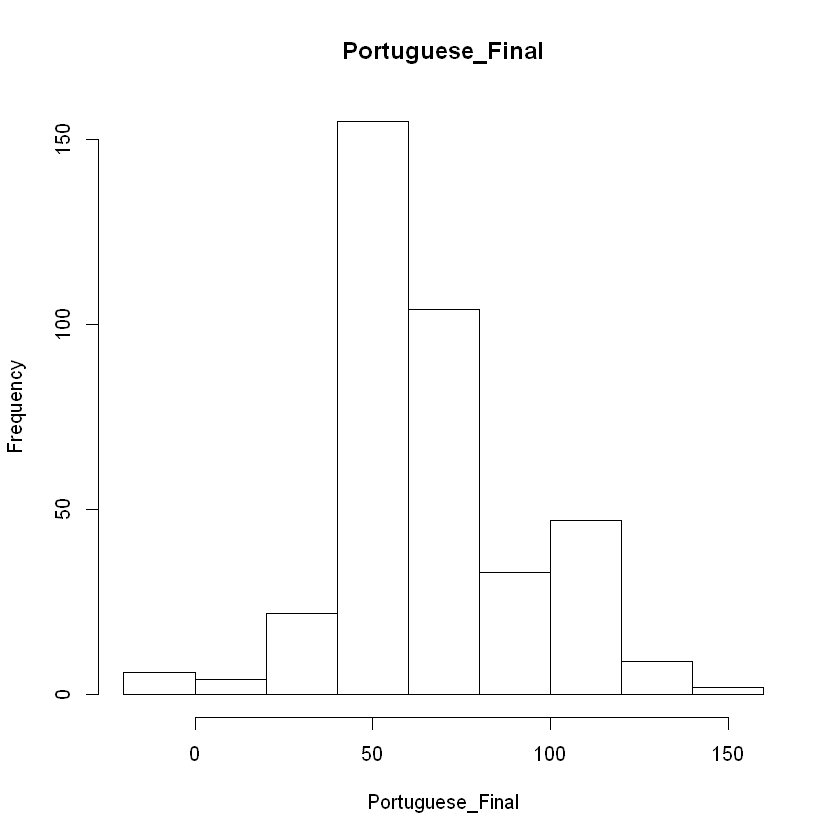

In [110]:
obc_d4 <- apply(d4_Sub, 2, function(x) BoxCox(x, lambda = "auto"))
    
for ( i in 1:2){    
hist(unlist(obc_d4[,i]), main = colnames[i], xlab = colnames[i])
        }